<a target="_blank" href="https://colab.research.google.com/github/Jonixmax/Challenge_Alura_Store/blob/main/AluraStoreLatam.ipynb#scrollTo=PjeLrwSQrUxL">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda['lat']

,lat
0,4.60971
1,6.25184
2,10.39972
3,3.43722
4,6.25184
...,...
2354,6.25184
2355,4.60971
2356,3.43722
2357,1.21361


# 1. Análisis de facturación



## 1.1. Facturación por tienda:

In [ ]:
#Algunos ajustes previos para la visualización de los datos
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns', None)

lista_tiendas = [tienda, tienda2, tienda3, tienda4]  # Crea una lista con los DataFrames de las tiendas
print("********** FACTURACION TOTAL POR TIENDA ********** \n")

#Función que calcula la facturación para cada una de las tiendas:
def imprimir_facturacion(tiendas):
  """Recibe una lista de DataFrames y calcula la facturación
  a partir de la columna Precio """
  contador = 1
  lista_aux = []
  for facturacion in tiendas:
    monto = sum(facturacion["Precio"])
    lista_aux.append(monto)
    print(f"Facturación total de la Tienda {contador}: {monto:,.2f}", "\n")
    contador += 1
  return lista_aux

facturación_por_tienda = imprimir_facturacion(lista_tiendas)


********** FACTURACION TOTAL POR TIENDA ********** 

Facturación total de la Tienda 1: 1,150,880,400.00 

Facturación total de la Tienda 2: 1,116,343,500.00 

Facturación total de la Tienda 3: 1,098,019,600.00 

Facturación total de la Tienda 4: 1,038,375,700.00 



## 1.2. Visualización de los resultados (facturación):

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

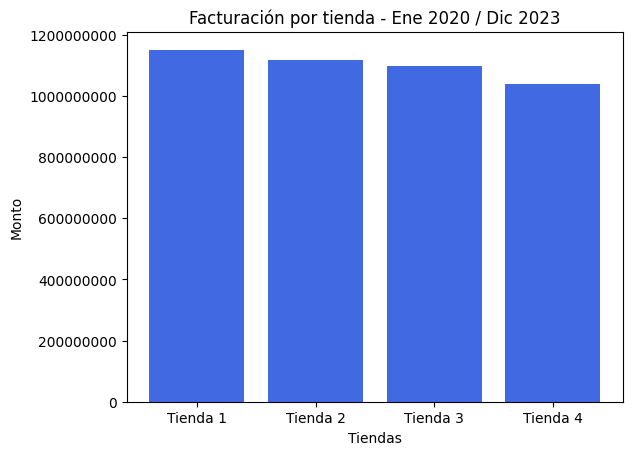

In [ ]:
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturacion = facturación_por_tienda

#Dibuja un gráfico de barras
plt.bar(tiendas, facturacion, color = "royalblue")
plt.title("Facturación por tienda - Ene 2020 / Dic 2023")
plt.xlabel("Tiendas")
plt.ylabel("Monto")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

# 2. Ventas por categoría

## 2.1.Monto de ventas por categoría para cada tienda:

In [ ]:
nombre_tiendas = {"tiendas": ["TIENDA 1", "TIENDA 2", "TIENDA 3", "TIENDA 4"]}

lista_categorias = []   #almacena las categorías para comparación
# Crea una lista con las categorías
for categoria in tienda["Categoría del Producto"]:
  if categoria not in lista_categorias:
    lista_categorias.append(categoria)

# Función que suma los montos de la facturación por categoría
def monto_categoria(tienda):
  """Esta función recibe como parámetro un DataFrame de una tienda
  y calcula los montos de facturación por categoría de producto"""
  monto_categoria_tienda = []
  monto_total = 0
  for categoria in lista_categorias:
    for i, monto in enumerate(tienda['Precio']):
      if categoria == tienda['Categoría del Producto'][i]:
        monto_total += monto
    monto_categoria_tienda.append(monto_total)
    monto_total = 0
  return monto_categoria_tienda

#listas con los montos por categoría por tienda
monto_categoria_tienda_1 = monto_categoria(tienda)
monto_categoria_tienda_2 = monto_categoria(tienda2)
monto_categoria_tienda_3 = monto_categoria(tienda3)
monto_categoria_tienda_4 = monto_categoria(tienda4)


#lista de listas con los montos por categoria
listas_monto_categoria = [monto_categoria_tienda_1, monto_categoria_tienda_2, monto_categoria_tienda_3, monto_categoria_tienda_4]

#Crea un diccionario con la facturación (montos) por categoría para cada tienda (tabla)
lista_aux = []
tabla_montos_categoria = {}
for i, categoria in enumerate(lista_categorias):
  for montos in listas_monto_categoria:
    lista_aux.append(montos[i])
  tabla_montos_categoria[categoria] = lista_aux
  lista_aux = []

#Imprime la tabla en pantalla
print("------ TABLA: FACTURACION POR CATEGORIA -----\n")
tabla_montos_categoria = {**nombre_tiendas, **tabla_montos_categoria}
pd.DataFrame(tabla_montos_categoria)


------ TABLA: FACTURACION POR CATEGORIA -----



,tiendas,Electrónicos,Muebles,Juguetes,Electrodomésticos,Artículos para el hogar,Deportes y diversión,Libros,Instrumentos musicales
0,TIENDA 1,429493500.0,187633700.0,17995700.0,363685200.0,12698400.0,39290000.0,8784900.0,91299000.0
1,TIENDA 2,410831100.0,176426300.0,15945400.0,348567800.0,14746900.0,34744500.0,10091200.0,104990300.0
2,TIENDA 3,410775800.0,201072100.0,19401100.0,329237900.0,15060000.0,35593100.0,9498700.0,77380900.0
3,TIENDA 4,409476100.0,192528900.0,20262200.0,283260200.0,15074500.0,33350100.0,9321300.0,75102400.0


## 2.2.Cantidad de productos vendidos por categoría

In [ ]:

#Función que suma la cantidad de productos vendidos por categoría
def cantidad_productos(tienda):
  """Recibe como parámetro un DataFrame de una tienda y calcula la
  cantidad de productos vendidor por categoría"""
  contador = 0
  cantidad_productos_tienda = []
  for categoria in lista_categorias:
    for i, categoria_producto in enumerate(tienda['Categoría del Producto']):
      if categoria == categoria_producto:
        contador += 1
    cantidad_productos_tienda.append(contador)
    contador = 0
  return cantidad_productos_tienda

# istas que contienen la cantidad de ventas por categoría de producto por tienda
cantidad_productos_tienda_1 = cantidad_productos(tienda)
cantidad_productos_tienda_2 = cantidad_productos(tienda2)
cantidad_productos_tienda_3 = cantidad_productos(tienda3)
cantidad_productos_tienda_4 = cantidad_productos(tienda4)

#lista de listas con los productos vendidos por categoria por tienda
productos_por_tienda = [cantidad_productos_tienda_1, cantidad_productos_tienda_2, cantidad_productos_tienda_3, cantidad_productos_tienda_4]

#crea un diccionario de la cantidad de productos por categoría por tienda (tabla)
total_por_producto = [] #lista con la sumatoria de productos por categoría vendidos por todas las tiendas
lista_aux = []
tabla_cantidad_productos = {}   #lista de listas
for i, categoria in enumerate(lista_categorias):
  for cantidad_productos in productos_por_tienda:
    lista_aux.append(cantidad_productos[i])
  total_por_producto.append(sum(lista_aux))   #calcula total por producto y lo guarda
  tabla_cantidad_productos[categoria] = lista_aux   #guarda lista en la lista tabla_cantidad_productos
  lista_aux = []

#Imprime la tabla
print("------ TABLA: PRODUCTOS VENDIDOS POR CATEGORIA -----\n")
tabla_cantidad_productos = {**nombre_tiendas, **tabla_cantidad_productos}
pd.DataFrame(tabla_cantidad_productos)


------ TABLA: PRODUCTOS VENDIDOS POR CATEGORIA -----



,tiendas,Electrónicos,Muebles,Juguetes,Electrodomésticos,Artículos para el hogar,Deportes y diversión,Libros,Instrumentos musicales
0,TIENDA 1,448,465,324,312,171,284,173,182
1,TIENDA 2,422,442,313,305,181,275,197,224
2,TIENDA 3,451,499,315,278,177,277,185,177
3,TIENDA 4,451,480,338,254,201,277,187,170


## 2.3. Visualización de los resultados, ventas por categoría:

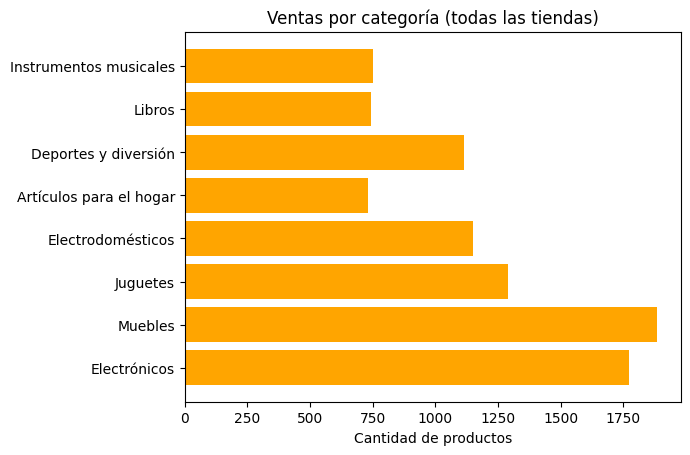

In [ ]:
#dibuja gráfica de barras horizontales por totales por categoría de productos
plt.barh(lista_categorias, total_por_producto, color = "orange")
plt.title("Ventas por categoría (todas las tiendas)")
plt.xlabel("Cantidad de productos")
plt.show()

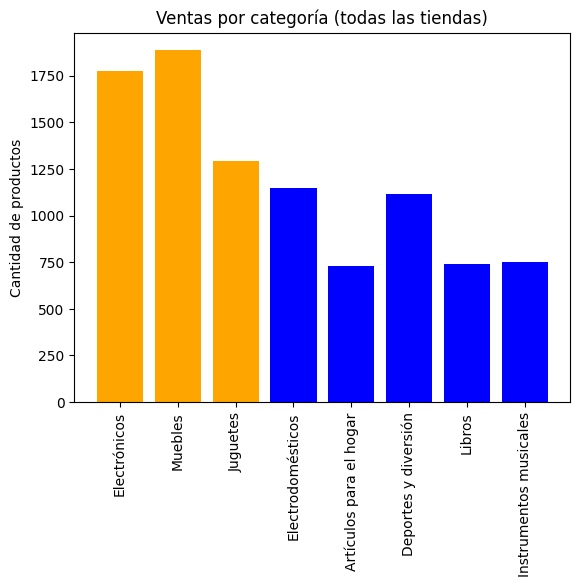

En color naranja las categorías más vendidas


In [ ]:
#dibuja gráfica de barras por totales por categoría de productos (Ora opción de visualización)
color_barra = ['orange', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue']
plt.bar(lista_categorias, total_por_producto, color = color_barra)
plt.title("Ventas por categoría (todas las tiendas)")
plt.ylabel("Cantidad de productos")
plt.xticks(rotation = 90)
plt.show()

print("En color naranja las categorías más vendidas")


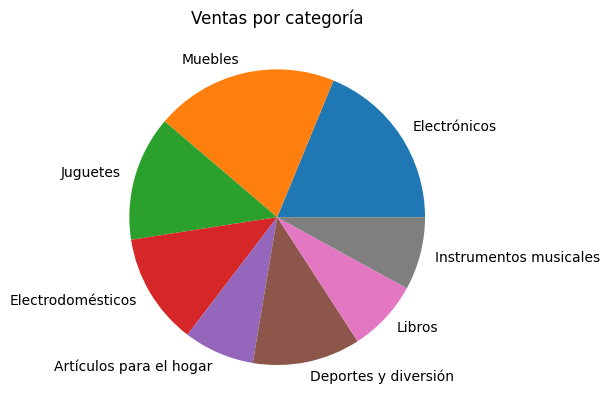

In [ ]:
# Crea un Pie chart para las ventas de productos por categoría para todas las tiendas
plt.pie(total_por_producto, labels = lista_categorias)
plt.title("Ventas por categoría")
plt.show()

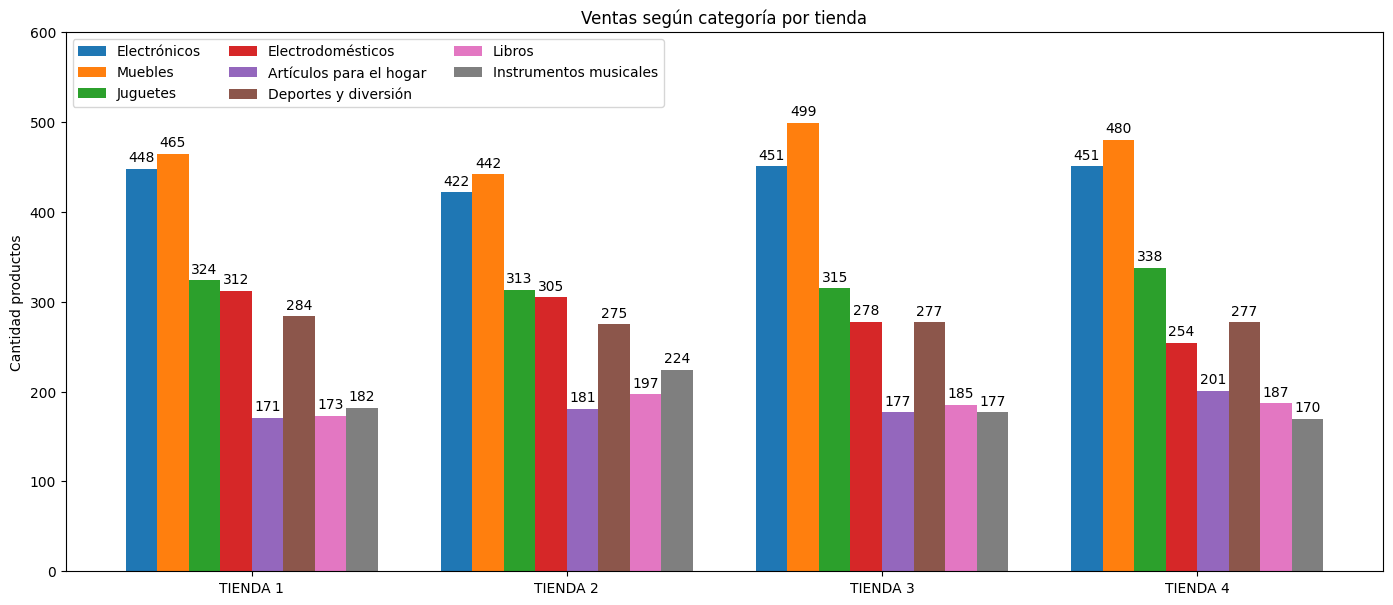

In [ ]:
nombre_tiendas = tabla_cantidad_productos["tiendas"]  #crea una lista con los nombres de las tiendas

# Crea un diccionario de la cantidad vendida de productos por categoría por tienda sin la clave "tiendas"
categorias_ventas = {clave: valores for (clave, valores) in tabla_cantidad_productos.items() if clave != "tiendas"}

x = np.arange(len(nombre_tiendas))   #ubicacion de las etiquetas
ancho_barra = 0.10  #ancho de las barras
multiplicador = 0

fig, ax = plt.subplots(figsize =(17, 7))

for categoria, cantidad in categorias_ventas.items():
  offset = ancho_barra * multiplicador
  contenedor = ax.bar(x + offset, cantidad, ancho_barra, label = categoria)
  ax.bar_label(contenedor, padding = 3)
  multiplicador += 1

# COnfiguración de la gráfica (texto, etiquetas, ticks del eje etc.)
ax.set_ylabel("Cantidad productos")
ax.set_title("Ventas según categoría por tienda")
ax.set_xticks(x + ancho_barra * 3.5, nombre_tiendas)
ax.legend(loc='upper left', ncols = 3)
ax.set_ylim(0, 600)
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
# Función que crea una lista con las calificaciones de las tiendas
def calcular_calificacion(lista):
  lista_aux = []
  for elemento in lista:
    promedio = sum(elemento["Calificación"]) / len(elemento["Calificación"])
    lista_aux.append(promedio)
  return lista_aux

# Muestra la lista generada de las calificaciones promedio
calificacion_promedio_tiendas = calcular_calificacion(lista_tiendas)
print("======== CALIFICACION PROMEDIO POR TIENDA ========")
pd.Series(calificacion_promedio_tiendas, index = tiendas)

======== CALIFICACION PROMEDIO POR TIENDA ========


,0
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


## 3.1. Visualización de los datos para las calificaciones de las ventas

In [ ]:
#preparación de los datos para armar una tabla y las gráficas
lista_auxiliar = []
calificacion_por_tiendas = []  #Lista de lista con los datos de las calificaciones para cada tienda
for x in range(1, 6):
  for tienda_aux in lista_tiendas:
    lista_auxiliar.append(list(tienda_aux['Calificación']).count(x))
  calificacion_por_tiendas.append(lista_auxiliar)
  lista_auxiliar = []

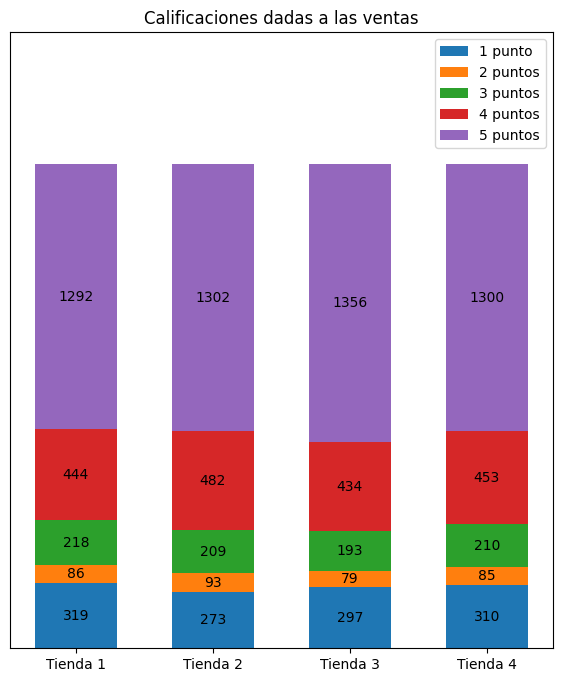

In [ ]:
import matplotlib.ticker as ticker
# lista con eqtiquetas para la gráfica
etiquetas_puntaje = ["1 punto", "2 puntos", "3 puntos", "4 puntos", "5 puntos"]

# crea un diccionario con datos para la gráfica
datos_puntaje = {llaves : valores for (llaves, valores) in zip(etiquetas_puntaje, calificacion_por_tiendas)}

ancho_barras = 0.6  # ancho de las barras

fig, ax = plt.subplots(figsize = (7, 8))
bottom = np.zeros(4)

#crea las barras de la gráfica
for etiquetas, puntajes in datos_puntaje.items():
  contenedor = ax.bar(tiendas, puntajes, ancho_barras, label = etiquetas, bottom = bottom)
  bottom += puntajes
  ax.bar_label(contenedor, label_type = "center")

ax.set_title("Calificaciones dadas a las ventas")
ax.legend()
ax.set_ylim(0, 3000)
ax.yaxis.set_major_locator(ticker.NullLocator())
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# crea una lista con los valores únicos de la lista de productos
nombre_productos = tienda['Producto'].unique()
nombre_productos.sort()
dic_temp = {}
dic_temp["Producto"] = nombre_productos

# crea una lista de las cantidades de productos vendidos por tipo en cada tienda
cantidad_productos_vendidos = []
lista_auxiliar = []

for una_tienda in lista_tiendas:
  for producto_n in nombre_productos:
    lista_auxiliar.append(list(una_tienda["Producto"]).count(producto_n))
  cantidad_productos_vendidos.append(lista_auxiliar)
  lista_auxiliar = []

#crea un diccionario con 4 listas, una por tienda, con la cantidad de productos por tipo
tabla_cantidad_productos = {llaves:valores for (llaves, valores) in zip(tiendas, cantidad_productos_vendidos)}

#agrega la columna de nombres de los productos al diccionario
tabla_cantidad_productos = {**dic_temp, **tabla_cantidad_productos}

#crea un DataFrame a partir del diccionario de productos
tabla_productos = pd.DataFrame(tabla_cantidad_productos)

#muestra la tabla con las cantidades de TODOS los productos vendidos por tienda
tabla_productos


,Producto,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Ajedrez de madera,49,45,47,39
1,Armario,60,54,49,34
2,Asistente virtual,40,38,39,50
3,Auriculares,50,37,43,44
4,Auriculares con micrófono,33,44,39,42
5,Balón de baloncesto,55,42,50,50
6,Balón de voleibol,42,46,48,48
7,Batería,53,61,41,48
8,Bicicleta,54,45,52,45
9,Bloques de construcción,56,54,35,54


## 4.1. Visualización de los datos (productos más o menos vendidos por tienda)

In [ ]:
#crea una tabla de los productos ordenada por la columna Tienda 1
tabla_productos_ordenada_tienda_1 = tabla_productos.sort_values(by = "Tienda 1")

#creas dos tablas: los 10 productos más vendidos y 10 menos vendidos, tienda 1
productos_mas_vendidos_t1 = tabla_productos_ordenada_tienda_1.tail(10)
productos_menos_vendidos_t1 = tabla_productos_ordenada_tienda_1.head(10)

#crea una tabla de los productos ordenada por la columna Tienda 2
tabla_productos_ordenada_tienda_2 = tabla_productos.sort_values(by = "Tienda 2")

#creas dos tablas: los 10 productos más vendidos y 10 menos vendidos, tienda 2
productos_mas_vendidos_t2 = tabla_productos_ordenada_tienda_2.tail(10)
productos_menos_vendidos_t2 = tabla_productos_ordenada_tienda_2.head(10)

#crea una tabla de los productos ordenada por la columna Tienda 3
tabla_productos_ordenada_tienda_3 = tabla_productos.sort_values(by = "Tienda 3")

#creas dos tablas: los 10 productos más vendidos y 10 menos vendidos, tienda 3
productos_mas_vendidos_t3 = tabla_productos_ordenada_tienda_3.tail(10)
productos_menos_vendidos_t3 = tabla_productos_ordenada_tienda_3.head(10)

#crea una tabla de los productos ordenada por la columna Tienda 4
tabla_productos_ordenada_tienda_4 = tabla_productos.sort_values(by = "Tienda 4")

#creas dos tablas: los 10 productos más vendidos y 10 menos vendidos, tienda 4
productos_mas_vendidos_t4 = tabla_productos_ordenada_tienda_4.tail(10)
productos_menos_vendidos_t4 = tabla_productos_ordenada_tienda_4.head(10)

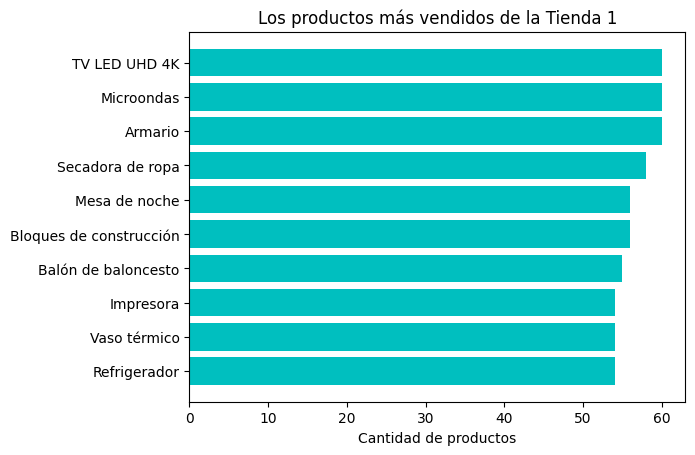

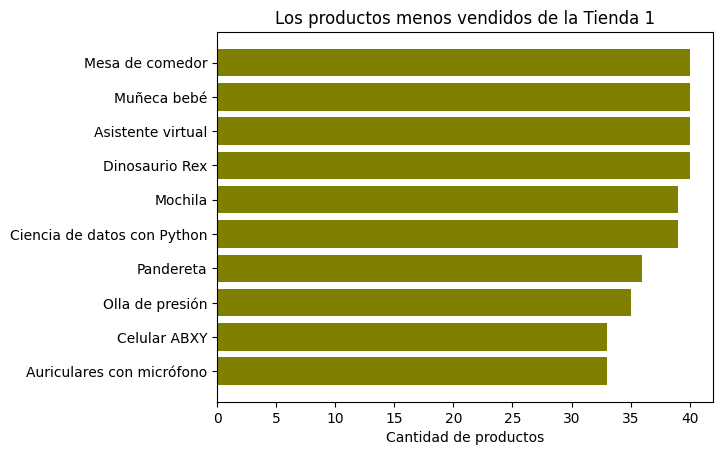

In [ ]:
#dibuja gráficas de los 10 productos más y menos vendidos en la tienda 1
plt.barh(productos_mas_vendidos_t1["Producto"], productos_mas_vendidos_t1["Tienda 1"], color = "c")
plt.title("Los productos más vendidos de la Tienda 1")
plt.xlabel("Cantidad de productos")
plt.show()

plt.barh(productos_menos_vendidos_t1["Producto"], productos_menos_vendidos_t1["Tienda 1"], color = "olive")
plt.title("Los productos menos vendidos de la Tienda 1")
plt.xlabel("Cantidad de productos")
plt.show()

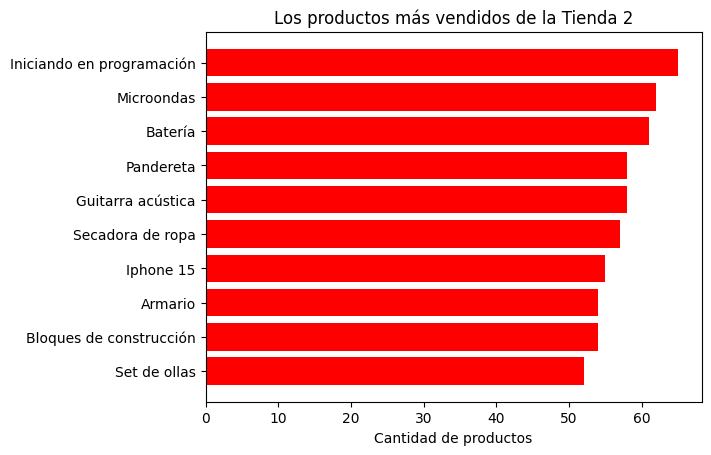

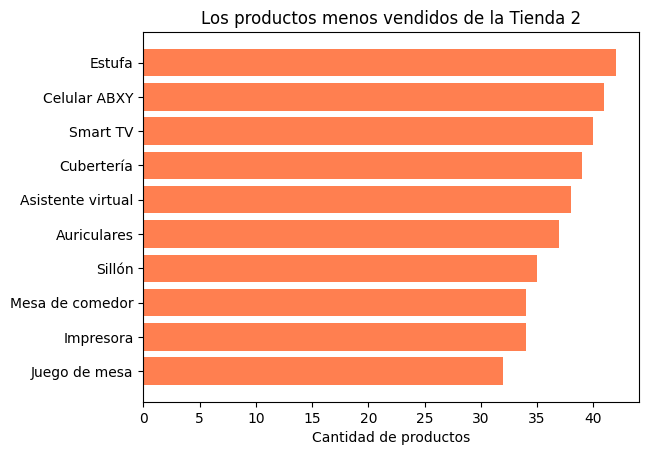

In [ ]:
#dibuja gráficas de los 10 productos más y menos vendidos en la tienda 2
plt.barh(productos_mas_vendidos_t2["Producto"], productos_mas_vendidos_t2["Tienda 2"], color = "r")
plt.title("Los productos más vendidos de la Tienda 2")
plt.xlabel("Cantidad de productos")
plt.show()

plt.barh(productos_menos_vendidos_t2["Producto"], productos_menos_vendidos_t2["Tienda 2"], color = "coral")
plt.title("Los productos menos vendidos de la Tienda 2")
plt.xlabel("Cantidad de productos")
plt.show()

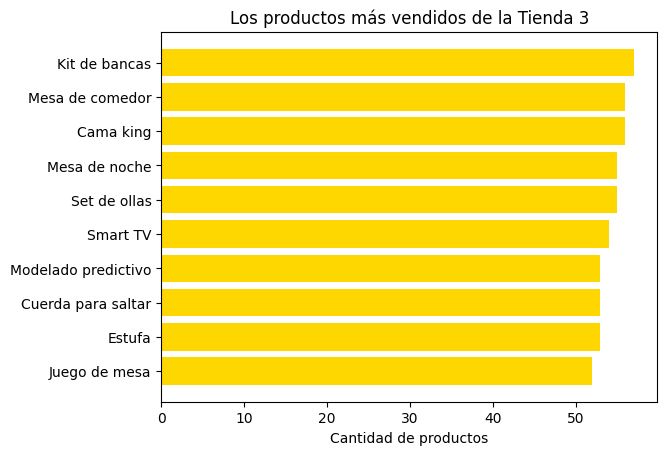

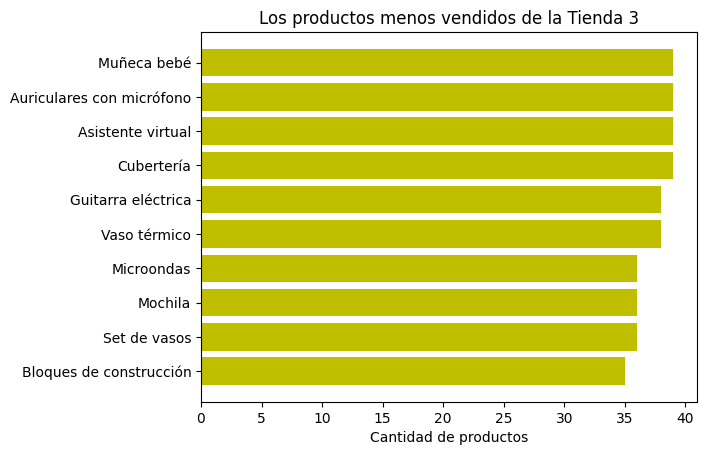

In [ ]:
#dibuja gráficas de los 10 productos más y menos vendidos en la tienda 3
plt.barh(productos_mas_vendidos_t3["Producto"], productos_mas_vendidos_t3["Tienda 3"], color = "gold")
plt.title("Los productos más vendidos de la Tienda 3")
plt.xlabel("Cantidad de productos")
plt.show()

plt.barh(productos_menos_vendidos_t3["Producto"], productos_menos_vendidos_t3["Tienda 3"], color = "y")
plt.title("Los productos menos vendidos de la Tienda 3")
plt.xlabel("Cantidad de productos")
plt.show()

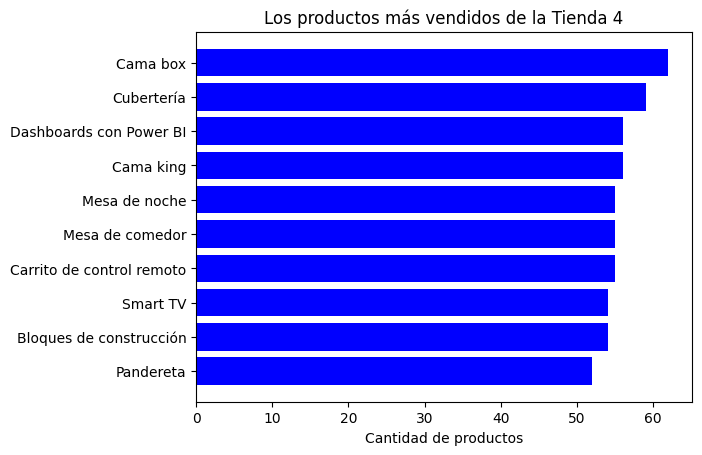

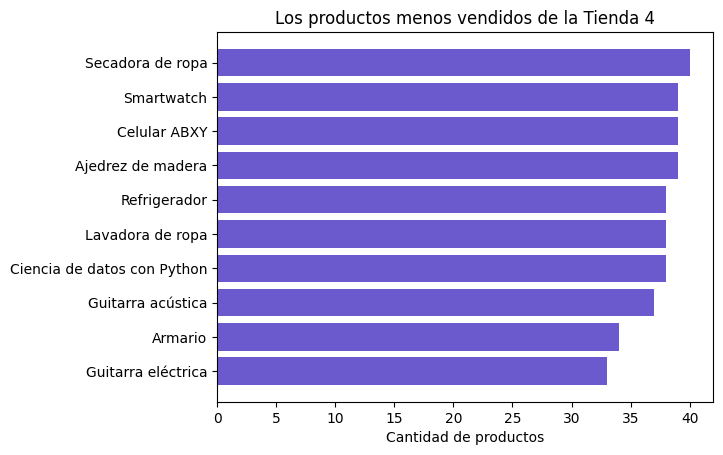

In [ ]:
#dibuja gráficas de los 10 productos más y menos vendidos en la tienda 4
plt.barh(productos_mas_vendidos_t4["Producto"], productos_mas_vendidos_t4["Tienda 4"], color = "blue")
plt.title("Los productos más vendidos de la Tienda 4")
plt.xlabel("Cantidad de productos")
plt.show()

plt.barh(productos_menos_vendidos_t4["Producto"], productos_menos_vendidos_t4["Tienda 4"], color = "slateblue")
plt.title("Los productos menos vendidos de la Tienda 4")
plt.xlabel("Cantidad de productos")
plt.show()

# 5. Envío promedio por tienda

In [ ]:
#Calcula el envío promedio para cada tienda
envio_promedio_por_tienda = []
for i, una_tienda in enumerate(lista_tiendas):
  promedio_envios = sum(una_tienda["Costo de envío"]) / len(una_tienda['Costo de envío'])
  print(f"Costo del envío promedio de la Tienda {i + 1}: {promedio_envios:.2f}", "\n")
  envio_promedio_por_tienda.append(promedio_envios)

Costo del envío promedio de la Tienda 1: 26018.61 

Costo del envío promedio de la Tienda 2: 25216.24 

Costo del envío promedio de la Tienda 3: 24805.68 

Costo del envío promedio de la Tienda 4: 23459.46 



## 5.1. Visualización del envío promedio por tienda

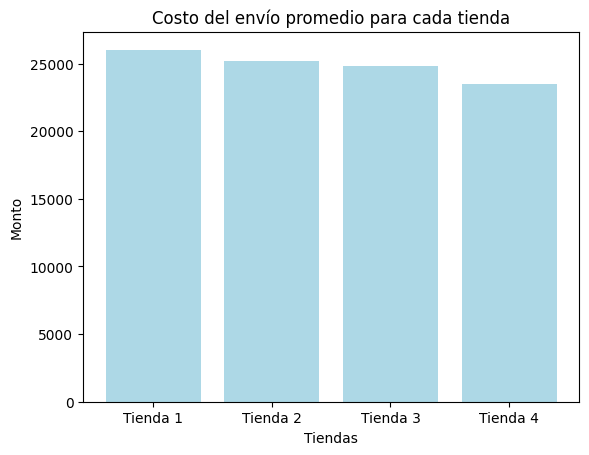

In [ ]:
#Dibuja un gráfico de barras
plt.bar(tiendas, envio_promedio_por_tienda, color = "lightblue")
plt.title("Costo del envío promedio para cada tienda")
plt.xlabel("Tiendas")
plt.ylabel("Monto")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()